In [1]:
from stardust2.stardust import classify
from astropy.table import Table
from copy import deepcopy
import pickle
import sncosmo
import numpy as np

from numpy.random import randint
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import snRequiem_stardust_classify as classifier

In [2]:
sndat = classifier.get_lens_model_corrected_photometry(classifier.snphotdata)

In [3]:
sndat

time,band,flux,fluxerr,zp,zpsys,snid,img,mu,muerr,dt
float64,str5,float64,float64,float64,str2,int64,float64,float64,float64,float64
57588.03,f105w,0.02244689019708216,0.005219951440557988,23.9,ab,1,1.1,3.907,0.534,0.0
57486.63,f105w,0.31799214198618075,0.1311611308684628,23.9,ab,2,1.2,7.381,3.044,101.4
57568.729999999996,f105w,0.03482071713147411,0.009002318577156264,23.9,ab,3,1.3,5.02,1.217,19.3
57587.97,f160w,0.15646275915024313,0.024086156875818148,23.9,ab,1,1.1,3.907,0.534,0.0
57486.57,f160w,0.4838775233708169,0.1996504025266793,23.9,ab,2,1.2,7.381,3.044,101.4
57568.67,f160w,0.22440239043824703,0.055109841223682766,23.9,ab,3,1.3,5.02,1.217,19.3


In [4]:
rerun = False
if rerun:
    results = classifier.run_stardust(verbose=False)
else:
    results = pickle.load(open('snReqieum_stardust_classify_results.pkl','rb'))


## Show the STARDUST2 results

referees want to be convinced that this is really 94% likely to be a SNIa.  

Try the following: 
* show a sampling of type Ia light curves (should look like good fits)
* show a sampling of 'best-fit' Type Ibc and II light curves (most are pretty bad)

Next thing to try?
* show some plots of chi2 or log likelihood spread over parameter space? 

/usr/local/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  


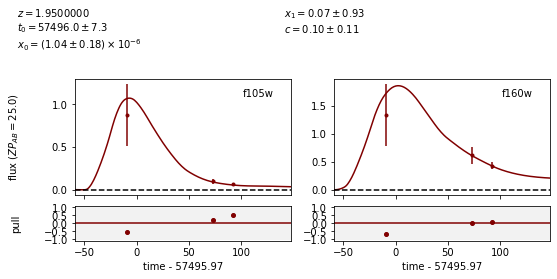

In [5]:
classify.plot_maxlike_fit(results['salt2-extended'], templateset='snana')
plt.savefig("/Users/rodney/Desktop/snRequiem_stardust_classify_Ia.png", overwrite=True)


In [6]:
sndat

time,band,flux,fluxerr,zp,zpsys,snid,img,mu,muerr,dt
float64,str5,float64,float64,float64,str2,int64,float64,float64,float64,float64
57588.03,f105w,0.02244689019708216,0.005219951440557988,23.9,ab,1,1.1,3.907,0.534,0.0
57486.63,f105w,0.31799214198618075,0.1311611308684628,23.9,ab,2,1.2,7.381,3.044,101.4
57568.729999999996,f105w,0.03482071713147411,0.009002318577156264,23.9,ab,3,1.3,5.02,1.217,19.3
57587.97,f160w,0.15646275915024313,0.024086156875818148,23.9,ab,1,1.1,3.907,0.534,0.0
57486.57,f160w,0.4838775233708169,0.1996504025266793,23.9,ab,2,1.2,7.381,3.044,101.4
57568.67,f160w,0.22440239043824703,0.055109841223682766,23.9,ab,3,1.3,5.02,1.217,19.3


In [7]:
from matplotlib import rcParams


In [8]:
rcParams['legend.shadow']=False
rcParams['legend.fontsize']=30
rcParams['text.usetex']=True

/usr/local/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later


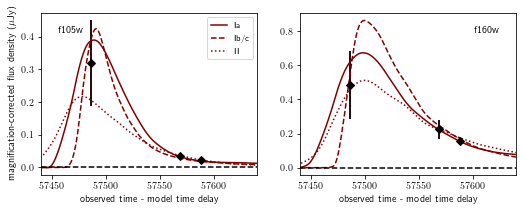

In [9]:
classify.plot_fits(results, nshow=3, templateset='snana', zp=23.9, dpi=300)
fig = plt.gcf()
ax0, ax1 = fig.axes
ax0.set_xlim(57440, 57640)
ax1.set_xlim(57440, 57640)
                       
for ax, band in zip(fig.axes, ['f105w','f160w']):
    iband = np.where(sndat['band']==band)[0]
    ax.errorbar(sndat['time'][iband], sndat['flux'][iband], sndat['fluxerr'][iband],
                marker='D', color='k', ls=' ', ms=5)

ax0.set_ylabel(r'magnification-corrected flux density ($\mu$Jy)', usetex=True)
ax0.set_xlabel(r'observed time - model time delay', usetex=True)
ax1.set_xlabel(r'observed time - model time delay', usetex=True)


plt.savefig("/Users/rodney/Desktop/snRequiem_stardust_classify_alltypes.pdf", 
            dpi=300, overwrite=True)

In [10]:
results['pIa'], results['pIbc'], results['pII']           

(0.9366156328171145, 0.0067655044565694345, 0.05661886272631575)

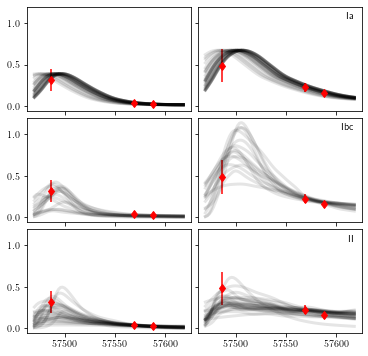

In [11]:
# Set up the axes grid
fig = plt.figure(1, (6., 6.))
axgrid = ImageGrid(fig, 111, nrows_ncols=(3,2), 
                   axes_pad=0.1, aspect=False, share_all=True)


# get the list of names for all CC SN templates used
templatenamesdict = {'Ibc':[k for k in results.keys() 
                            if k in classify.SubClassDict_SNANA['ibc']],
                     'II':[k for k in results.keys() 
                           if k in classify.SubClassDict_SNANA['ii']]
                    }

# The actual SN data:
sn = results['salt2-extended']['sn']

# make a time array for plotting models
t0 =57500  # MJD near first data point
time = np.arange(t0-30, t0+120, 2)


# ====================
# TOP ROW OF AXES: 
axlist = [axgrid[0], axgrid[1]]

# Plot N=30 random samples from the Type Ia nested sampling sequence

# Grab 30 random samples from the Type Ia nested sampling sequence
# We draw from the second half of the sampling sequence to make sure we've settled in to near the likelihood peak
# vparamnames = results['salt2-extended']['res']['vparam_names']
samples = results['salt2-extended']['res']['samples']  # Each sample step gives ['t0', 'x0', 'x1', 'c']
isamples = randint(1200, 2012, size=30)

for band,ax in zip(['f105w','f160w'], axlist):

    # grab x1, c from the nested sampling
    modelfit = results['salt2-extended']['fit']
    for i in isamples:
        t0,x0,x1,c = samples[i]
        modelfit.set(t0=t0,x0=x0,x1=x1,c=c)
        
        # get the flux vs time for this model
        f = modelfit.bandflux(band, time, zp=23.9, zpsys='ab')

        # plot it
        ax.plot(time, f, color='k', alpha=0.1, lw=3)

    # plot the observations
    iband = np.where(sn['band']==band)
    ax.errorbar(sn['time'][iband], sn['flux'][iband], 
                sn['fluxerr'][iband], color='r', marker='d', ls=' ')

    if ax==axlist[-1]:
        ax.text(0.95,0.95, 'Ia', transform=ax.transAxes, ha='right', va='top')

# ====================
# Middle and bottom rows of axes
axesdict = {'Ibc':[axgrid[2], axgrid[3]],
            'II': [axgrid[4], axgrid[5]]}

# Plot max-likelihood light curves for all the Type Ibc and II templates
for sntype in ['Ibc', 'II']:
    tempnamelist = templatenamesdict[sntype]
    axlist = axesdict[sntype]
    for band,ax in zip(['f105w','f160w'], axlist):
        for tempname in tempnamelist:
            modelfit = results[tempname]['fit']

            # get the flux vs time for this model
            f = modelfit.bandflux(band, time, zp=23.9, zpsys='ab')
            # plot it
            ax.plot(time, f, color='k', alpha=0.1, lw=3)
            continue
        # plot the observations
        iband = np.where(sn['band']==band)
        ax.errorbar(sn['time'][iband], sn['flux'][iband], 
                    sn['fluxerr'][iband], color='r', marker='d', ls=' ')
            
        if ax==axlist[-1]:
            ax.text(0.95,0.95, sntype, transform=ax.transAxes, ha='right', va='top')          